## Importing shit I need

In [1]:
from pymatgen.io.vasp.outputs import Vasprun, BSVasprun
from pymatgen.core.structure import Structure
from pymatgen.electronic_structure.plotter import BSPlotter, DosPlotter
import os
import numpy as np
from matplotlib import pyplot as plt
from pymatgen.io.vasp.inputs import Kpoints
from pymatgen.core import Structure
from pymatgen.symmetry.kpath import KPathLatimerMunro
from pymatgen.symmetry.bandstructure import HighSymmKpath
import os

## Functions

In [2]:
def get_kpoint_brillouin_zone(path, dest, mocha, rel_type):
    struct = Structure.from_file(f"{path}POSCAR")
    kpath = KPathLatimerMunro(struct)
    kpts = kpath.get_kpoints()
    kpath = HighSymmKpath(struct)
    print(kpath)
    kpts = Kpoints.automatic_linemode(divisions=10,ibz=kpath)
    if not os.path.exists(f"{path}/BAND"):
        os.mkdir(f"{path}/BAND")
    kpts.write_file(f"{dest}/k-point_brillouin_zone/{mocha}_{rel_type}")

# def plot_dos():
# os.chdir(f"{root}{m}/{r}/DOS")
#         v = Vasprun('vasprun.xml')
#         cdos = v.complete_dos
#         element_dos = cdos.get_element_dos()

#         # Make DOS plotter
#         fig, ax = plt.subplots(len(element_dos), 1, sharex=True, figsize=(6, 6))
#         fig.subplots_adjust(hspace=0, left=0.18)

#         # Plot on each separate axis
#         for i, e in enumerate(element_dos):
#             plotter = DosPlotterAxes(zero_at_efermi=False, stack=False)
#             plotter.add_dos_dict({e: element_dos[e]})
#             plotter.get_plot(ax=ax[i])

#         # # Clean things up
#         for i in range(len(element_dos)):
#             if i != 2:
#                 ax[i].set_xlabel(None)
#                 ax[i].set_ylabel(None)
#                 ax[i].set_xlim(-5,5)
#         fig.text(x=0.1, y=0.5, s=ax[1].get_ylabel(), va="center", ha="center", rotation=90)
#         ax[len(element_dos)-1].set_xlabel("Energy (eV)")
#         plt.savefig(f"{m}_{r}_density_of_states", dpi=600)

def plot_band(path):
    os.chdir(path)
    v = BSVasprun("vasprun.xml")
    bs = v.get_band_structure(kpoints_filename="KPOINTS",line_mode=True)
    a = bs.get_band_gap()
    b=bs.get_cbm()
    c=bs.get_vbm()
        # d=bs.get_projection_on_elements()
        # e=bs.get_kpoint_degeneracy()
        # print("band gap", a, "\n")
        # print("cbm", b,"\n")
        # print("vbm",c,"\n")
        # print("proj",d,"\n")
        # print(e)
    plotter = BSPlotter(bs)
    plotter.add_bs(bs)
    plotter.ylim=[-2, 6]
    plotter.get_plot(zero_to_efermi=False, vbm_cbm_marker=True)
    plotter.plot_brillouin()
    plotter.save_plot(filename="bandstructure.png", img_format="png", ylim=[-2,6])
        #plotter.save_plot(filename="brillouin_zone.eps", img_format="eps")

        # # get brillouin zone
        # result = Vasprun('vasprun.xml', parse_potcar_file=False)
        # plotter = DosPlotter()
        # plotter.add_dos('Total DOS', result.tdos)    

In [18]:
root = "/Users/adrianaladera/Desktop/MIT/research/MOChAs/relaxation_results/prototypes/3methoxy_dimethyl/BAND/"
destination = "/Users/adrianaladera/Desktop/MIT/research/CSE_thesis/VASP_shit/"

get_kpoint_brillouin_zone(root, destination, "3-methoxy_benzamine", "3ISIF")

/Users/adrianaladera/opt/anaconda3/envs/deeznuts/lib/python3.11/site-packages/pymatgen/symmetry/kpath.py:181: UserWarning: The input structure does not match the expected standard primitive! The path may be incorrect. Use at your own risk.
  warn(


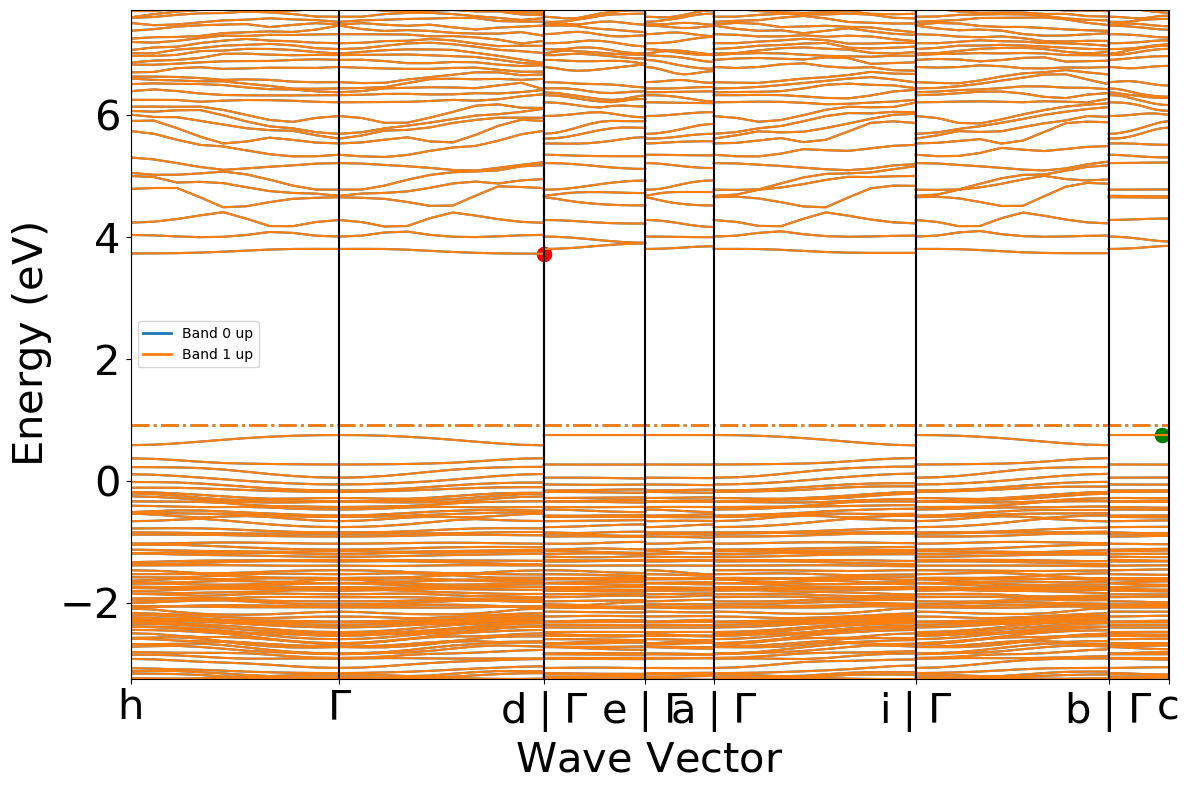

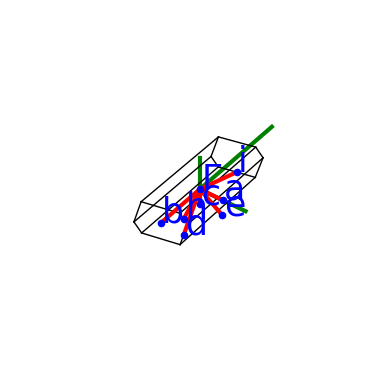

TypeError: BSPlotter.save_plot() got an unexpected keyword argument 'img_format'

In [3]:
# path = "/Users/adrianaladera/Desktop/MIT/research/MOChAs/relaxation_results/prototypes/3methoxy_dimethyl/BAND/"
path = "/Users/adrianaladera/Desktop/MIT/research/MOChAs/VASP_calculations/originals/galac_rtr/UNRELAXED/band/"
plot_band(path)